# The objective is to develop a model that you can use to predict the sales on the basis of the three media budgets.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
advertising =  pd.read_csv("D:\Excel dataset\\Advertising.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
advertising.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.shape

(200, 4)

In [7]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
#first step of EDA is describe()
pd.set_option('precision',2)
pd

<module 'pandas' from 'C:\\Users\\bansa\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [9]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.97,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


In [10]:
(advertising==0).sum(axis = 0)

TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64

In [11]:
advertising.Sales.value_counts()

9.7     5
15.9    4
11.7    4
12.9    4
20.7    3
       ..
25.5    1
15.6    1
17.6    1
3.2     1
20.8    1
Name: Sales, Length: 121, dtype: int64

# Relationship between sales and TV

C:\Users\bansa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


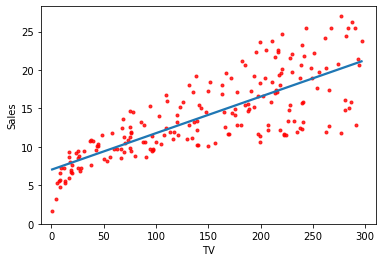

In [12]:
sns.regplot(advertising.TV, advertising.Sales, order = 1, ci = None, scatter_kws = {'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(bottom =0)
plt.show()

C:\Users\bansa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


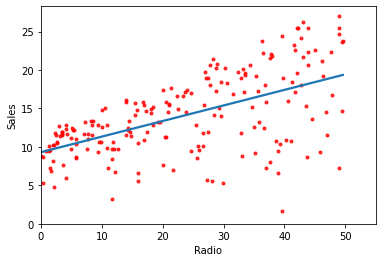

In [13]:
sns.regplot(advertising.Radio, advertising.Sales, order = 1, ci = None, scatter_kws = {'color':'r', 's':9})
plt.xlim(0,55)
plt.ylim(bottom =0)
plt.show()

C:\Users\bansa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


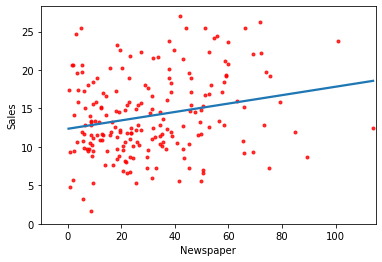

In [14]:
sns.regplot(advertising.Newspaper, advertising.Sales, order = 1, ci = None, scatter_kws = {'color':'r','s':9})
plt.xlim(-10,115)
plt.ylim(bottom =0)
plt.show()

# Data Normalisation

In [15]:
from sklearn.preprocessing import scale
X= scale(advertising.TV, with_mean = True, with_std = False).reshape(-1,1)
y = advertising.Sales

In [16]:
X[0:5] 

array([[  83.0575],
       [-102.5425],
       [-129.8425],
       [   4.4575],
       [  33.7575]])

In [17]:
X.mean()

1.0089706847793422e-14

In [18]:
X.std()

85.63933175679269

# Linear regression (scaled data)

In [19]:
import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression()

In [20]:
regr.fit(X,y)

LinearRegression()

In [21]:
regr.intercept_

14.0225

In [22]:
regr.coef_

array([0.04753664])

In [23]:
min_rss = sum((regr.intercept_+ regr.coef_*X -y.values.reshape(-1,1))**2)
min_rss

array([2102.53058313])

# Linear regression (Unscaled data)

In [24]:
regr =  skl_lm.LinearRegression()
X = advertising.TV.values.reshape(-1,1)
y = advertising.Sales

In [25]:
regr.fit(X,y)

LinearRegression()

In [26]:
regr.intercept_

7.032593549127693

In [27]:
regr.coef_

array([0.04753664])

In [28]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1)**2))
min_rss

-41938.75

In [29]:
mse = min_rss/len(y)
mse

-209.69375

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
Sales_pred = regr.predict(X)

In [31]:
mean_squared_error(y,Sales_pred)

10.512652915656757

In [32]:
 r2_score(y,Sales_pred)

0.611875050850071

# Regresssion using stats model

In [33]:
import statsmodels.formula.api as smf
est = smf.ols('Sales ~ TV', advertising).fit()

In [34]:
#ols(ordinary list square method)

In [35]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.47e-42
Time:                        20:00:04   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
est.params

Intercept    7.03
TV           0.05
dtype: float64

In [37]:
#RSS
((advertising.Sales-(est.params[0]+est.params[1]*advertising.TV))**2).sum()

2102.5305831313512

In [38]:
#MSE
((advertising.Sales-(est.params[0]+est.params[1]*advertising.TV))**2).sum()/len(advertising.Sales)

10.512652915656757

# simple linear regression

In [40]:
#linear regression sales ad radio
est = smf.ols('Sales ~ Radio', advertising).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243


In [42]:
#linear regression sales ad newspaper
est = smf.ols('Sales ~ Newspaper',advertising).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


In [45]:
est = smf.ols('Sales ~ TV + Radio + Newspaper',advertising).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        20:15:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [47]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.78
Radio,0.05,1.00,0.35,0.58
Newspaper,0.06,0.35,1.00,0.23
Sales,0.78,0.58,0.23,1.00
